In [19]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from scipy.stats import linregress
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans
from matplotlib import colors
import pylab as pyl

import pywt
import scipy.io as sio
import pandas as pd
#import holoviews as hv
#import param
#import panel as pn
#from panel.pane import LaTeX

from PIL import Image
from io import BytesIO
import requests
import warnings
from ipywidgets import interact
#hv.extension('bokeh')

# <FONT COLOR='red'>Partie 0: Récupération des données</FONT>

**HYDROSWOT**

In [21]:
data_hydro = pd.read_csv("../databases/HYDROSWOT_100m_V3.csv", sep=";")
data_hydro.dropna(inplace=True)
print('Hydro -> Missing Data : ',data_hydro.isna().sum().sum(), '  Shape is : ', data_hydro.shape)
display(data_hydro.head())

Hydro -> Missing Data :  0   Shape is :  (16603, 41)


,site_no,station_name,river,stream_type,lon,lat,flowacc,stage,W,dH,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
0,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.527048,125.8824,0.999744,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,76.172317
1,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,8.909304,152.0952,8.382000,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,1486.634446
2,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,1.271016,116.4336,0.743712,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,46.156460
3,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.752344,112.1664,2.225040,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,150.645624
4,2419890,TALLAPOOSA RIVER NEAR MONT.-MONT. WATER WORKS,TALLAPOOSA,river,-86.19,32.43,12033.084713,2.173224,120.3960,1.645920,...,0.0,0.0,46314.126839,27537.165438,16147.596327,5.236103e+06,2545.144341,1831.073927,1303.980932,140.168391


**PEPSI**

In [20]:
data_pepsi = pd.read_csv("../databases/PEPSIR_raw_LF_perfect.csv", sep=";")
print('Pepsi -> Missing Data : ',data_pepsi.isna().sum().sum(), '  Shape is : ', data_pepsi.shape)
display(data_pepsi.head())

Pepsi -> Missing Data :  0   Shape is :  (55525, 21)


,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
0,Connecticut,1,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,26.306667,475.403333,...,0.001768,541.200050,12.808404,515.403333,821.447783,10.945707,0.225114,0.217360,0.965178,922.263333
1,Connecticut,2,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.960000,443.906667,...,0.001606,381.870528,12.586607,515.403333,821.447783,10.945707,0.225114,0.165027,0.704906,581.980000
2,Connecticut,3,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.810000,427.006667,...,0.001539,316.600322,12.513133,515.403333,821.447783,10.945707,0.225114,0.141175,0.595232,460.586667
3,Connecticut,4,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.776667,423.786667,...,0.001521,302.424628,12.499948,515.403333,821.447783,10.945707,0.225114,0.135371,0.569428,435.253333
4,Connecticut,5,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.616667,406.016667,...,0.001469,236.099400,12.410309,515.403333,821.447783,10.945707,0.225114,0.113845,0.471288,334.273333


**Suppression de certaines données (HYDROSWOT)**

In [22]:
data_hydro.drop(['LC1','LC2','LC3','LC4','LC5','LC6','LC7','LC8','LC9','LC10','LC11','LC12',
                 'Q5_GSCD','Q10_GSCD','Q20_GSCD','QMEAN_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD'],axis=1,inplace=True)

**Suppression des débits inférieurs à 100 $m^3/s$**

In [23]:
data_pepsi = data_pepsi.loc[data_pepsi['Q']>100]
data_hydro = data_hydro.loc[data_hydro['Q']>100]

**Suppresions des largeurs inférieures à 80m**

In [24]:
data_pepsi = data_pepsi.loc[data_pepsi['W']>80]
data_hydro = data_hydro.loc[data_hydro['W']>80]

**Modification des valeurs de alpha & beta (PEPSI)**

In [25]:
data_pepsi.head()

,river,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,...,S,dA,K,A0,Abar,alpha,beta,Fr,U,Q
0,Connecticut,1,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,26.306667,475.403333,...,0.001768,541.200050,12.808404,515.403333,821.447783,10.945707,0.225114,0.217360,0.965178,922.263333
1,Connecticut,2,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.960000,443.906667,...,0.001606,381.870528,12.586607,515.403333,821.447783,10.945707,0.225114,0.165027,0.704906,581.980000
2,Connecticut,3,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.810000,427.006667,...,0.001539,316.600322,12.513133,515.403333,821.447783,10.945707,0.225114,0.141175,0.595232,460.586667
3,Connecticut,4,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.776667,423.786667,...,0.001521,302.424628,12.499948,515.403333,821.447783,10.945707,0.225114,0.135371,0.569428,435.253333
4,Connecticut,5,1,-72.611298,41.959,25078.300781,1.079975,1260.057129,25.616667,406.016667,...,0.001469,236.099400,12.410309,515.403333,821.447783,10.945707,0.225114,0.113845,0.471288,334.273333


In [26]:
#drop current alpha&beta columns
data_pepsi=data_pepsi.drop(columns=['alpha','beta'])
data_pepsi.reset_index(drop=True, inplace=True)

#calculate new alpha&beta
columns = ['alpha','beta']
df_aux = pd.DataFrame(columns=columns)

data_pepsi_aux = data_pepsi.groupby("river", as_index=False).mean()
rivers = data_pepsi_aux['river'].tolist()
for i in rivers:
    river_data = data_pepsi[data_pepsi["river"] == i]
    aux = river_data.groupby("reach", as_index=False).mean()
    reachs = aux['reach'].tolist()
    for j in reachs:
        reach_data = river_data[river_data["reach"] == j]
        aux=np.ones((np.shape(reach_data)[0],2))
        
        A0r = reach_data["A0"]
        dArp = reach_data["dA"]
        Qrp = reach_data["Q"]
        Srp = reach_data["S"]
        Wrp = reach_data["W"]
        Zrp = reach_data["height"]
        Zr0 = np.min(Zrp)
        Wr0 = np.min(Wrp)
        c1rp = Wrp**(-2./5.) * Srp**(3./10.)
        c2rp = c1rp * dArp
        c3rp = (Zrp - Zr0) #à revoir potentiellement, cf. Kévin
        c4r = 1.0 / Wr0
        
        x = c4r * A0r + c3rp
        y = Qrp**(3./5.) / (c1rp * A0r + c2rp)
        res = linregress(np.log(x), np.log(y))
        
        a = res.slope
        b = res.intercept
        alpha = np.exp(b)**(5./3.)
        beta = a * 5. / 3.
        
        aux[:,0] = alpha*aux[:,0]
        aux[:,1] = beta*aux[:,1]
        
        df_reach = pd.DataFrame(aux, columns=columns)
        df_aux = df_aux.append(df_reach,ignore_index=True)
        
#add new alpha&beta to the original dataframe
data_pepsi = pd.concat([data_pepsi,df_aux],axis=1)
warnings.filterwarnings("ignore")

**Mise à jour des noms de rivières (HYDROSWOT)**

In [28]:
data_hydro['river']= data_hydro['river'].str.upper()
data_hydro['river'] = data_hydro['river'].str.lstrip()
data_hydro['river'] = data_hydro['river'].str.rstrip()

In [29]:
print("Variables pepsi : " , data_pepsi.columns)
print("Variables hydro : " , data_hydro.columns)

Variables pepsi :  Index(['river', 'day', 'reach', 'lon', 'lat', 'flowacc', 'sinuosity',
       'meandwave', 'height', 'W', 'A', 'S', 'dA', 'K', 'A0', 'Abar', 'Fr',
       'U', 'Q', 'alpha', 'beta'],
      dtype='object')
Variables hydro :  Index(['site_no', 'station_name', 'river', 'stream_type', 'lon', 'lat',
       'flowacc', 'stage', 'W', 'dH', 'dA', 'U', 'A0', 'Abar', 'Amed', 'Sdem',
       'clay', 'sand', 'silt', 'PA', 'TA', 'Q'],
      dtype='object')


**Moyennes des variables par rivière**

In [30]:
river_means_pepsi=data_pepsi.groupby("river", as_index=False).mean()
river_means_hydro=data_hydro.groupby("river", as_index=False).mean()

# <FONT COLOR="Red">Partie 1 : Statistiques descriptives</font> 

## 1.1 Première approche

**HYDROSWOT**

In [33]:
display(river_means_hydro.describe())

,site_no,lon,lat,flowacc,stage,W,dH,dA,U,A0,Abar,Amed,Sdem,clay,sand,silt,PA,TA,Q
count,1.340000e+02,134.000000,134.000000,1.340000e+02,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000,134.000000
mean,4.167913e+10,-89.661294,38.707776,5.292473e+04,9.286926,220.957947,3.264755,560.735713,0.772313,303.888958,699.006635,573.961217,0.000679,19.103494,38.570608,42.325142,1036.021562,12.432710,638.299181
std,4.824028e+11,12.077877,5.238236,1.529205e+05,21.610475,153.901486,8.329826,1487.283193,0.294341,587.839600,1009.076429,955.442405,0.000989,4.727358,12.046436,10.181674,272.861092,4.582436,995.724585
min,1.012469e+06,-122.989000,28.360000,3.392884e+02,0.231648,87.172800,0.162560,17.763061,0.263347,5.645756,54.439180,24.194892,0.000000,7.181818,15.264463,13.165289,197.295002,2.794338,102.554840
25%,2.382438e+06,-94.797500,35.054492,5.964743e+03,2.497197,130.758806,1.176236,181.842469,0.562712,65.144040,267.812682,195.291224,0.000200,16.146555,28.312989,37.363636,905.638889,8.951825,309.894344
50%,5.353889e+06,-89.621834,38.758737,1.363499e+04,3.995529,164.098643,1.789230,268.682142,0.734861,127.370397,412.072298,334.493294,0.000408,18.828952,36.735760,42.786408,1063.988272,12.284439,409.497570
75%,7.250266e+06,-81.355912,42.088113,3.178452e+04,6.478200,241.331875,3.068752,443.798114,0.942992,286.833457,749.008060,583.668036,0.000892,21.932125,47.331566,49.565188,1187.263183,16.246748,631.134009
max,5.584222e+12,-68.150000,48.837429,1.365331e+06,151.283960,1002.890146,91.670124,13637.773873,1.763776,4190.959360,7663.379313,7052.958699,0.008572,32.933884,79.702479,61.995473,1634.444444,21.732312,7470.601293


**PEPSI**

In [31]:
display(river_means_pepsi.describe())

,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,Fr,U,Q,alpha,beta
count,29.000000,29.000000,29.000000,29.000000,2.900000e+01,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,28.000000,28.000000
mean,145.767569,4.553993,-52.451062,39.075888,4.034065e+05,1.109080,4121.047504,98.886543,923.693334,4368.124929,0.000220,1640.065223,38.761811,2734.952825,4343.262963,0.119973,0.750575,3996.479452,30.490667,0.274887
std,64.772077,2.291576,63.248068,6.062336,6.112239e+05,0.237712,7275.361681,82.970792,1803.236241,6988.037056,0.000536,3364.671422,13.258586,3954.565986,6928.906896,0.062612,0.287438,7052.546386,15.351366,0.432077
min,76.098807,1.998382,-121.994858,23.606131,8.484700e+03,1.001894,933.535217,3.333505,106.823067,214.244322,0.000008,55.278036,14.112584,91.393339,182.651849,0.040108,0.273451,198.389412,8.380126,-0.120259
25%,110.500000,2.959405,-89.424400,38.371399,2.855860e+04,1.001894,1096.933960,15.512602,225.778028,863.756084,0.000020,171.941158,32.904442,477.927053,856.679512,0.072838,0.570230,503.491760,23.815422,0.117411
50%,110.500000,4.000000,-85.278900,38.738621,2.341812e+05,1.039897,2476.190674,95.227569,375.240450,1442.688253,0.000044,480.744766,37.755101,940.614231,1431.633018,0.091728,0.724872,1033.050154,27.461072,0.217812
75%,183.000000,5.444444,1.439300,41.630207,2.341812e+05,1.112189,4400.909180,148.751418,654.147334,4957.478551,0.000194,862.883767,44.937547,4099.595052,4957.478551,0.174503,0.890953,3830.904487,32.921526,0.266914
max,298.000000,11.250000,91.975410,48.638222,2.361844e+06,2.244732,39357.117188,275.265129,9013.110585,35123.972858,0.002824,15093.801193,76.649548,19967.199390,34710.470485,0.239151,1.339772,31534.985385,81.836240,2.275176


**Nombre d'observations par rivières et par site (HYDROSWOT)**

In [34]:
hydro_by_site = data_hydro.groupby('site_no', as_index = False).describe()

In [35]:
categorie = np.array(hydro_by_site['site_no']['count'].to_list()).astype(int)

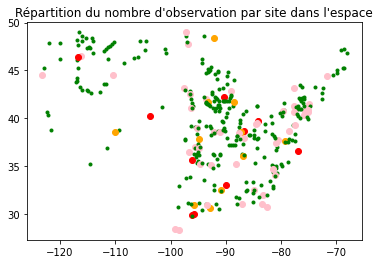

nombre de rivière par catégorie [ 10.  11.  48. 289.]


In [36]:
aux = np.zeros(4)
for i in range(0,len(categorie)):
    if categorie[i] >= 6 :
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], '.', color = 'g')
        aux[3]+= 1
    if categorie[i] == 1:
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], 'o', color = 'r')
        aux[0]+= 1
    if categorie[i] == 2:
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], 'o', color = 'orange')
        aux[1]+= 1
    if categorie[i] < 6 and categorie[i]>2 :
        plt.plot(hydro_by_site["lon"]["mean"][i], hydro_by_site["lat"]["mean"][i], 'o', color = 'pink' )
        aux[2]+= 1

plt.title("Répartition du nombre d'observation par site dans l'espace")
plt.show()
print("nombre de rivière par catégorie", aux)

## 1.2 Boxplots

In [9]:
class Boxplot_hydro(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_hydro.columns)
    def view(self):
        affichage = hv.BoxWhisker(data_hydro, "river",self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)
    
class Boxplot_pepsi(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_pepsi.columns)
    def view(self):
        affichage = hv.BoxWhisker(data_pepsi, "river",self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)

**HYDROSWOT**

In [10]:
boxplotH = Boxplot_hydro()
pn.Column(boxplotH.param,boxplotH.view)

Column
    [0] Column(margin=5, name='Boxplot_hydro', width=300)
        [0] StaticText(value='<b>Boxplot_hydro</b>')
        [1] Select(name='Variable', options=OrderedDict([('site_no', ...]), value='Q')
    [1] ParamMethod(method)

**PEPSI**

In [11]:
boxplotP = Boxplot_pepsi()
pn.Column(boxplotP.param,boxplotP.view)

Column
    [0] Column(margin=5, name='Boxplot_pepsi', width=300)
        [0] StaticText(value='<b>Boxplot_pepsi</b>')
        [1] Select(name='Variable', options=OrderedDict([('river', ...]), value='Q')
    [1] ParamMethod(method)

## 1.3 Corrélations

**HYDROSWOT**

In [38]:
dataH = data_hydro.drop(columns=['site_no', 'river','station_name','stream_type' ,'U']) #remove site_no & station_name & U
corr = dataP.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,Fr,Q,alpha,beta
lon,1.000000,-0.211459,-0.148886,0.381952,0.262506,-0.629848,0.349911,0.311495,0.010206,0.293100,0.394287,0.244248,0.356900,0.126601,0.288624,0.069223,-0.196248
lat,-0.211459,1.000000,-0.386699,0.297972,-0.392603,-0.007545,-0.509039,-0.582724,0.143320,-0.423653,-0.522755,-0.616661,-0.671234,0.035291,-0.515511,-0.024289,-0.020928
flowacc,-0.148886,-0.386699,1.000000,-0.203860,0.314467,0.446146,0.329430,0.408779,-0.116713,0.290479,0.238510,0.440646,0.471839,0.189502,0.401719,0.264888,-0.046100
sinuosity,0.381952,0.297972,-0.203860,1.000000,-0.001994,-0.374905,-0.090854,-0.141079,0.035271,-0.051704,0.045168,-0.214595,-0.162898,0.270833,-0.094519,-0.047646,-0.016234
meandwave,0.262506,-0.392603,0.314467,-0.001994,1.000000,-0.079441,0.328744,0.301283,-0.016203,0.328511,0.225147,0.183028,0.349806,0.315812,0.378926,0.040344,-0.065887
height,-0.629848,-0.007545,0.446146,-0.374905,-0.079441,1.000000,-0.182409,-0.176820,-0.027154,-0.154204,-0.131472,-0.153408,-0.207443,0.149725,-0.157031,0.065282,0.126539
W,0.349911,-0.509039,0.329430,-0.090854,0.328744,-0.182409,1.000000,0.926704,-0.076961,0.900706,0.474544,0.690608,0.750101,0.096942,0.903360,0.071552,-0.071235
A,0.311495,-0.582724,0.408779,-0.141079,0.301283,-0.176820,0.926704,1.000000,-0.142991,0.901181,0.549539,0.834627,0.867772,-0.015993,0.940424,0.066731,-0.056491
S,0.010206,0.143320,-0.116713,0.035271,-0.016203,-0.027154,-0.076961,-0.142991,1.000000,-0.065519,-0.400267,-0.198996,-0.168791,0.544476,-0.102867,-0.137492,-0.032660
dA,0.293100,-0.423653,0.290479,-0.051704,0.328511,-0.154204,0.900706,0.901181,-0.065519,1.000000,0.356037,0.513492,0.595683,0.137248,0.927921,0.066510,-0.068161


**PEPSI**

In [37]:
dataP = data_pepsi.drop(columns=['river', 'day','reach','U']) #remove site_no & station_name & U
corr = dataP.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,flowacc,sinuosity,meandwave,height,W,A,S,dA,K,A0,Abar,Fr,Q,alpha,beta
lon,1.000000,-0.211459,-0.148886,0.381952,0.262506,-0.629848,0.349911,0.311495,0.010206,0.293100,0.394287,0.244248,0.356900,0.126601,0.288624,0.069223,-0.196248
lat,-0.211459,1.000000,-0.386699,0.297972,-0.392603,-0.007545,-0.509039,-0.582724,0.143320,-0.423653,-0.522755,-0.616661,-0.671234,0.035291,-0.515511,-0.024289,-0.020928
flowacc,-0.148886,-0.386699,1.000000,-0.203860,0.314467,0.446146,0.329430,0.408779,-0.116713,0.290479,0.238510,0.440646,0.471839,0.189502,0.401719,0.264888,-0.046100
sinuosity,0.381952,0.297972,-0.203860,1.000000,-0.001994,-0.374905,-0.090854,-0.141079,0.035271,-0.051704,0.045168,-0.214595,-0.162898,0.270833,-0.094519,-0.047646,-0.016234
meandwave,0.262506,-0.392603,0.314467,-0.001994,1.000000,-0.079441,0.328744,0.301283,-0.016203,0.328511,0.225147,0.183028,0.349806,0.315812,0.378926,0.040344,-0.065887
height,-0.629848,-0.007545,0.446146,-0.374905,-0.079441,1.000000,-0.182409,-0.176820,-0.027154,-0.154204,-0.131472,-0.153408,-0.207443,0.149725,-0.157031,0.065282,0.126539
W,0.349911,-0.509039,0.329430,-0.090854,0.328744,-0.182409,1.000000,0.926704,-0.076961,0.900706,0.474544,0.690608,0.750101,0.096942,0.903360,0.071552,-0.071235
A,0.311495,-0.582724,0.408779,-0.141079,0.301283,-0.176820,0.926704,1.000000,-0.142991,0.901181,0.549539,0.834627,0.867772,-0.015993,0.940424,0.066731,-0.056491
S,0.010206,0.143320,-0.116713,0.035271,-0.016203,-0.027154,-0.076961,-0.142991,1.000000,-0.065519,-0.400267,-0.198996,-0.168791,0.544476,-0.102867,-0.137492,-0.032660
dA,0.293100,-0.423653,0.290479,-0.051704,0.328511,-0.154204,0.900706,0.901181,-0.065519,1.000000,0.356037,0.513492,0.595683,0.137248,0.927921,0.066510,-0.068161


## 1.4 Analyse en composantes principales

In [39]:
pca_hydro = PCA()
pca_pepsi = PCA()

In [42]:
# On retire les variables qualitatives + Q (+ alpha & beta pour PEPSI)
data_pepsi_ACP = data_pepsi.drop(['river','day','reach','Q','alpha','beta'],axis=1)
data_hydro_ACP = data_hydro.drop(['site_no','station_name','river','stream_type','Q'],axis=1)

In [43]:
# On scale 
pepsiR = pd.DataFrame(scale(data_pepsi_ACP), columns = data_pepsi_ACP.columns)
hydroR = pd.DataFrame(scale(data_hydro_ACP), columns = data_hydro_ACP.columns)

C_pepsi = pca_pepsi.fit(pepsiR).transform(pepsiR)
C_hydro = pca_hydro.fit(hydroR).transform(hydroR)

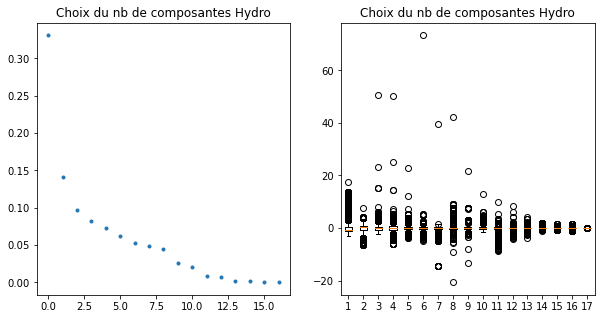

In [47]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].plot(pca_hydro.explained_variance_ratio_,'.')
axs[0].set_title("Choix du nb de composantes Hydro")

axs[1].boxplot(C_hydro)
axs[1].set_title("Choix du nb de composantes Hydro")

plt.show()

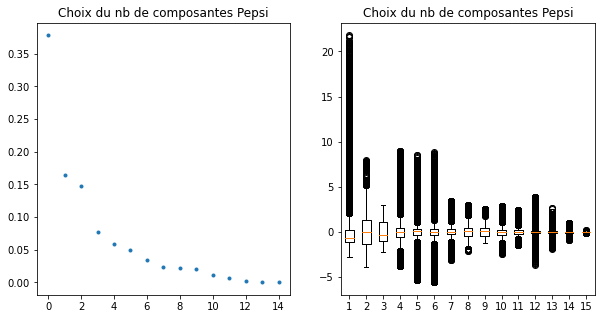

In [46]:
fig,axs = plt.subplots(1,2,figsize=(10,5))

axs[0].plot(pca_pepsi.explained_variance_ratio_,'.')
axs[0].set_title("Choix du nb de composantes Pepsi")

axs[1].boxplot(C_pepsi)
axs[1].set_title("Choix du nb de composantes Pepsi")

plt.show()

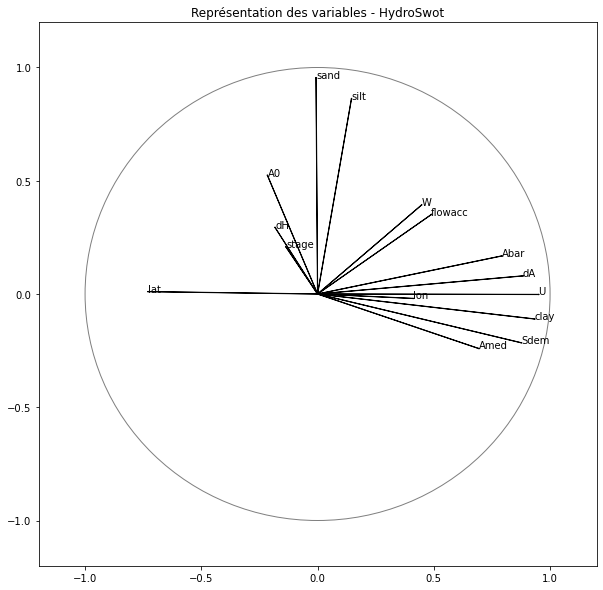

In [49]:
## coordonnées et représentation des variables
coord1_H=pca_hydro.components_[0]*np.sqrt(pca_hydro.explained_variance_[0])
coord2_H=pca_hydro.components_[1]*np.sqrt(pca_hydro.explained_variance_[1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_hydro_ACP.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
plt.title("Représentation des variables - HydroSwot")
ax.add_patch(c)
plt.show()

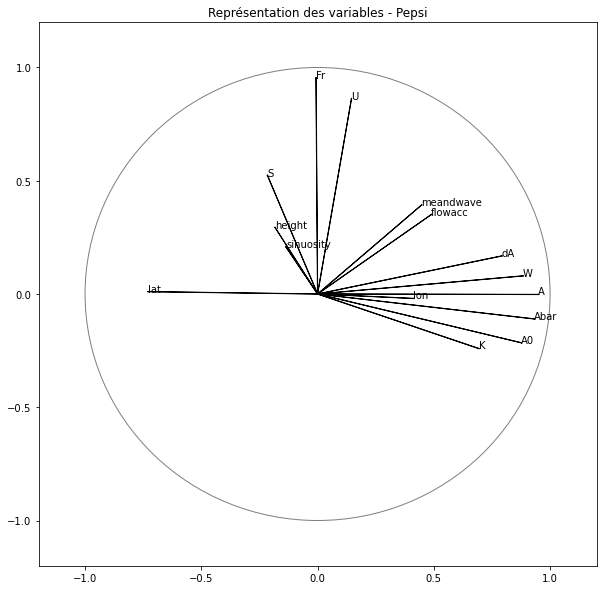

In [48]:
## coordonnées et représentation des variables => dim 1 en fonction de dim 2 
coord1=pca_pepsi.components_[0]*np.sqrt(pca_pepsi.explained_variance_[0])
coord2=pca_pepsi.components_[1]*np.sqrt(pca_pepsi.explained_variance_[1])

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, data_pepsi_ACP.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.title("Représentation des variables - Pepsi")
plt.show()

# <FONT COLOR="Red">Partie 2 : Classification</font> 

## 2.1 Classification de HydroSwot

### 2.1.1 Classification "à la main"

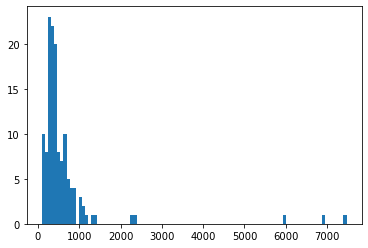

In [57]:
plt.figure()
plt.hist(river_means_hydro['Q'],bins=100)
plt.show()

On remarque déja 2 groupes, rivières dont la moyenne de débit < $3000$ et celles avec un énorme débit. On peut également distinguer 3 groupes : $[100,1000] , [1000,3000] , [3000,8000]$. 

In [18]:
# 2 classes
lim = 1000
c1 = river_means_hydro[river_means_hydro['Q']<=lim]
c2 = river_means_hydro[river_means_hydro['Q']>lim]

On cherche d'autres variables réalisant la même séparation en classes que le débit 

In [19]:
class Histo_classe_hydro(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_hydro.columns)
    def view(self):
        bins1 = int((len(c1)+len(c2))/len(c1)*10)
        bins2 = int((len(c1)+len(c2))/len(c2)*10)
        a1,a2 = np.histogram(c1[self.variable],bins1)
        b1,b2 = np.histogram(c2[self.variable], bins2)
        affichage1 = hv.Histogram((a2,a1)).opts(width=900, color = 'r')
        affichage2 = hv.Histogram((b2,b1)).opts(width=900, color = 'g')
        
        return pn.Row(affichage1*affichage2)
    
Histo_classeH = Histo_classe_hydro()
pn.Column(Histo_classeH.param,Histo_classeH.view)

NameError: name 'param' is not defined

### 2.1.2 Classification supervisée par K-means

**Principe :**

On détermine tout d'abord un nombre $k$ de classe . 
   1. Initialisation aléatoire des centres de classes
   2. On tire k individus qui sont affectés à la classe dont le centre est le plus proche au sens de la métrique euclidienne choisie. 
   3. Calcul du centre de gravité de chaque classe
   4. On répète 2. et 3. jusqu'à convergence de l'algorithme

Cela permet de maximiser la variance inter-classe et minimiser la variance intra-classe. 
 
(Métrique utilisée : métrique de Mahalanobis - inverse de la matrice variance-covariance)

(119, 17)


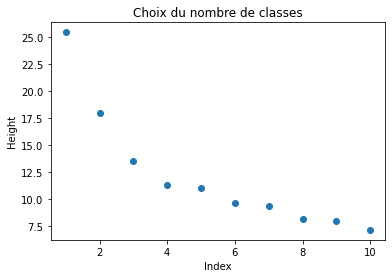

In [50]:
hydroRech = hydroR[::100] # Tirage d'un sous-échantillon des pixels
print(hydroRech.shape)
Z = linkage(hydroRech, method = 'complete', metric = 'euclidean') # choix de la distance
height = Z[:, 2]  # Décroissance des sauts
x = np.arange(10) + 1

height = sorted(height, reverse = True)

plt.scatter(x,height[0:10]) 
plt.xlabel('Index')
plt.ylabel('Height')
plt.title("Choix du nombre de classes")
plt.show()

#### 2.1.2.1 2 classes

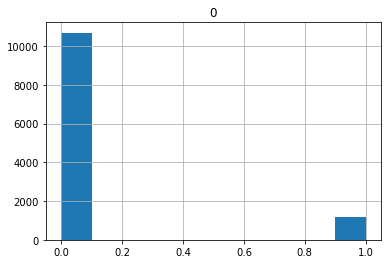

In [62]:
hydroCP =C_hydro[:,0:2]
n_classes = 2
kmeans_hydro = KMeans(n_clusters = n_classes, random_state = 0, n_jobs = -1).fit(hydroCP)
kclassesACP_hydro_2 = kmeans_hydro.labels_
# effectifs des classes
pd.DataFrame(kclassesACP_hydro_2).hist()
plt.show()

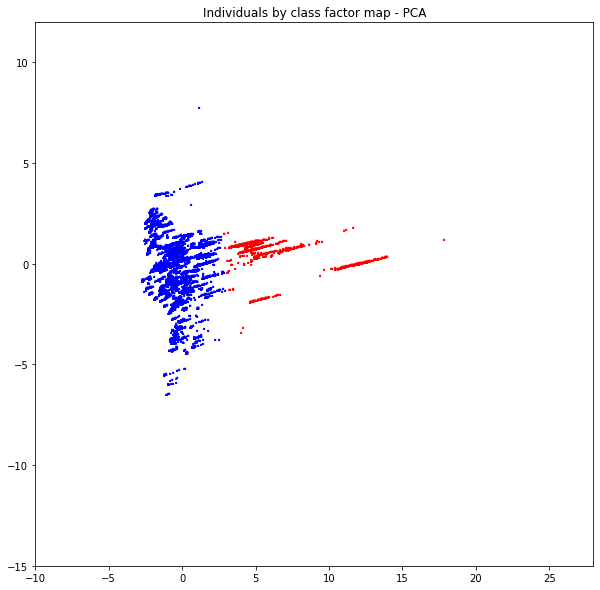

In [52]:
pc1 = C_hydro[:,0]
pc2 = C_hydro[:,1]
coul = ['b', 'r']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_hydro_2):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA')
plt.show()

#### 2.1.2.2 3 classes

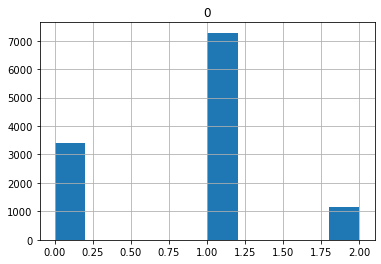

In [61]:
hydroCP =C_hydro[:,0:2]
n_classes = 3
kmeans_hydro = KMeans(n_clusters = n_classes, random_state = 0, n_jobs = -1).fit(hydroCP)
kclassesACP_hydro_3 = kmeans_hydro.labels_
# effectifs des classes
pd.DataFrame(kclassesACP_hydro_3).hist()
plt.show()

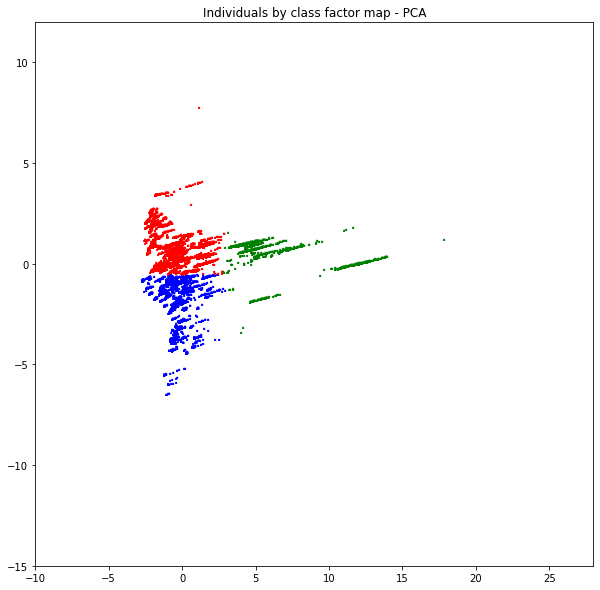

In [54]:
coul = ['b', 'r', 'g']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_hydro_3):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA')
plt.show()

#### 2.1.2.3 Comparaison entre 2 et 3 classes

In [55]:
data_hydro_classe = data_hydro
data_hydro_classe['2_classes'] = kclassesACP_hydro_2
data_hydro_classe['3_classes'] = kclassesACP_hydro_3

In [56]:
class Boxplot_hydro_classe(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_hydro_classe.columns)
    nb_classe = param.ObjectSelector(default="2_classes",objects=['2_classes','3_classes'])
    def view(self):
        affichage = hv.BoxWhisker(data_hydro_classe, self.nb_classe,self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)
Boxplot_classe_H = Boxplot_hydro_classe()
pn.Column(Boxplot_classe_H.param,Boxplot_classe_H.view)

NameError: name 'param' is not defined

In [293]:
display(data_hydro_classe[data_hydro_classe['3_classes']==0]['river'].unique())
display(data_hydro_classe[data_hydro_classe['3_classes']==1]['river'].unique())
display(data_hydro_classe[data_hydro_classe['3_classes']==2]['river'].unique())

array(['TALLAPOOSA', 'ALABAMA', 'COOSA', 'CONECUH', 'MOBILE', 'ARKANSAS',
       'RED', 'WHITE', 'ARK', 'BLACK', 'TOMBIGBEE', 'COLORADO',
       'SACRAMENTO', 'OCMULGEE', 'ALTAMAHA', 'CHATTAHOOCHEE', 'SAVANNAH',
       'LITTLE', 'SUWANNEE', 'FLINT', 'WABASH', 'EAST FORK WHITE',
       'SPRING', 'KENTUCKY', 'GREEN', 'FLOODWAY AT ARKANSAS', 'OUACHITA',
       'OHIO', 'CUMBERLAND', 'POTOMAC', 'BAYOU ANACOCO', 'ANDROSCOGGIN',
       'CALCASIEU', 'KENNEBEC', 'PISCATAQUIS', 'PENOBSCOT', 'CONNECTICUT',
       'MISSISSIPPI', 'YAZOO', 'BIG BLACK', 'SOUTH PLATTE', 'DELAWARE',
       'CHEMUNG', 'HUDSON', 'CHENANGO', 'SUSQUEHANNA', 'OSWEGO',
       'GENESEE', 'CAPE FEAR', 'PEE DEE', 'MUSKINGUM', 'SCIOTO',
       'VERDIGRIS', 'NEOSHO', 'POTEAU', 'DEEP FORK', 'CANADIAN',
       'ILLINOIS', 'WEST BRANCH SUSQUEHANNA', 'WB SUSQUEHANNA',
       'SCHUYLKILL', 'ALLEGHENY', 'LEHIGH', 'JUNIATA', 'CATAWBA',
       'WATEREE', 'BROAD', 'CONGAREE', 'TENNESSEE', 'HIWASSEE', 'VILLAGE',
       'FRENCH BROAD', 'HAR

array(['SNAKE', 'COLORADO', 'SACRAMENTO', 'SOUTH PLATTE', 'SPOKANE',
       'PEND OREILLE', 'KOOTENAI', 'CLARK FORK', 'WABASH', 'CLEARWATER',
       'WHITE', 'WAPSIPINICON', 'BEAVER', 'MISSISSIPPI', 'IOWA',
       'DES MOINES', 'MISSOURI', 'CEDAR', 'SOUTH SKUNK', 'SKUNK',
       'BIG SIOUX', 'MAQUOKETA', 'POTTAWATOMIE', 'KANSAS', 'NEOSHO',
       'GREEN', 'MARMATON', 'OHIO', 'ST. JOHN', 'AROOSTOOK', 'RAINY',
       'NAMAKAN', 'MINNESOTA', 'ST. CROIX', 'OSAGE', 'YELLOWSTONE',
       'PLATTE', 'FLATHEAD', 'RED', 'GREAT MIAMI', 'VERDIGRIS',
       'WILLAMETTE', 'AUGLAIZE', 'MAUMEE', 'SUSQUEHANNA', 'YOUGHIOGHENY',
       'ALLEGHENY', 'JAMES', 'SNOHOMISH', 'YAKIMA', 'FOX', 'CHELAN',
       'CHIPPEWA', 'WISCONSIN', 'ROCK', 'ILLINOIS'], dtype=object)

array(['ARKANSAS', 'WABASH', 'MISSISSIPPI', 'IOWA', 'NEOSHO', 'VERDIGRIS',
       'OHIO', 'ATCHAFALAYA', 'SUSQUEHANNA', 'TENNESSEE', 'VILLAGE',
       'CYPRESS', 'WISCONSIN', 'ILLINOIS'], dtype=object)

    - Quand on fait 2 classes, Arkansas, Mississipi, Iowa, Neosho, Ohio, ... (la majorité des rivières présentes dans la classe 1) sont dans la classe 0 aussi.
 

## 2.2 Classification de Pepsi

### 2.2.1 Classification "à la main"

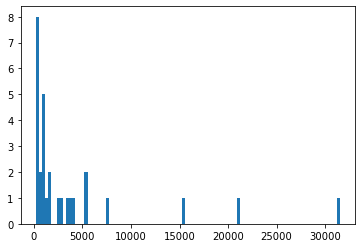

In [58]:
plt.figure()
plt.hist(river_means_pepsi['Q'],bins=100)
plt.show()

On peut créer 2 groupes de rivières : celles à "petit" débit qui sont les plus nombreuses et qui sont < $10000$, et les 3 autres rivières qui sont à "grand" débit. Ce sont les rivières MississippiDownstream, Jamuna, et Padma.

### 2.2.2 Classification supervisée par K-means

In [299]:
""" PepsiRech = pepsiR[::100] # Tirage d'un sous-échantillon des pixels

Z = linkage(PepsiRech, method = 'complete', metric = 'euclidean') # choix de la distance
height = Z[:, 2]  # Décroissance des sauts
x = np.arange(10) + 1

height = sorted(height, reverse = True)

plt.scatter(x,height[0:10]) 
plt.xlabel('Index')
plt.ylabel('Height')
plt.title("Choix du nombre de classes")
plt.show() """

' PepsiRech = pepsiR[::100] # Tirage d\'un sous-échantillon des pixels\n\nZ = linkage(PepsiRech, method = \'complete\', metric = \'euclidean\') # choix de la distance\nheight = Z[:, 2]  # Décroissance des sauts\nx = np.arange(10) + 1\n\nheight = sorted(height, reverse = True)\n\nplt.scatter(x,height[0:10]) \nplt.xlabel(\'Index\')\nplt.ylabel(\'Height\')\nplt.title("Choix du nombre de classes")\nplt.show() '

#### 2.2.2.1 2 classes

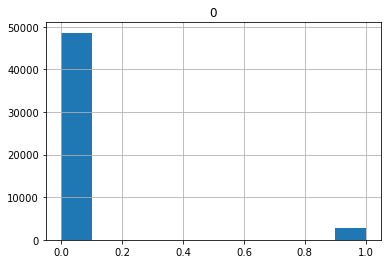

In [60]:
pepsiCP =C_pepsi[:,0:2]
kmeans_pepsi2 = KMeans(n_clusters = 2, random_state = 0, n_jobs = -1).fit(pepsiCP)
kclassesACP_pepsi_2 = kmeans_pepsi2.labels_
pd.DataFrame(kclassesACP_pepsi_2).hist()
plt.show()

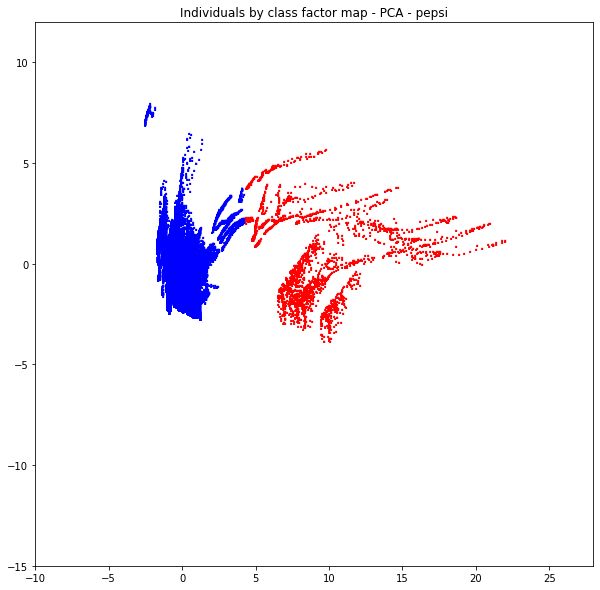

In [65]:
pc1 = C_pepsi[:,0]
pc2 = C_pepsi[:,1]
coul = ['b', 'r']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_pepsi_2):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA - pepsi')
plt.show()

#### 2.2.2.1 3 classes

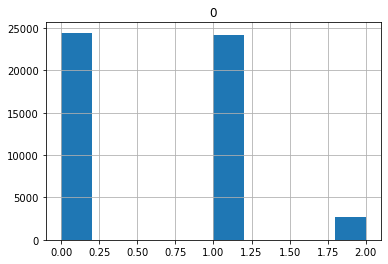

In [66]:
kmeans_pepsi3 = KMeans(n_clusters = 3, random_state = 0, n_jobs = -1).fit(pepsiCP)
kclassesACP_pepsi_3 = kmeans_pepsi3.labels_
pd.DataFrame(kclassesACP_pepsi_3).hist()
plt.show()

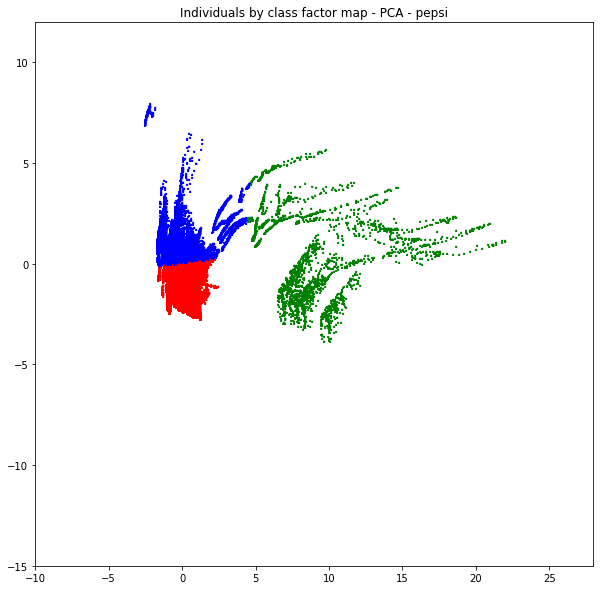

In [67]:
coul = ['b', 'r','g']
plt.figure(figsize = (10, 10))
for i, j, indcoul in zip(pc1, pc2, kclassesACP_pepsi_3):
    plt.text(i, j, ".", size = 20, color = coul[indcoul])
plt.axis((-10, 28, -15, 12))
plt.title('Individuals by class factor map - PCA - pepsi')
plt.show()

#### 2.2.2.3 Comparaison entre 2 et 3 classes

In [76]:
data_pepsi_classe = data_pepsi.copy()
data_pepsi_classe['2_classes'] = kclassesACP_pepsi_2
data_pepsi_classe['3_classes'] = kclassesACP_pepsi_3

In [60]:
class Boxplot_pepsi_classe(param.Parameterized):
    variable= param.ObjectSelector(default="Q",objects=data_pepsi_classe.columns)
    nb_classe = param.ObjectSelector(default="2_classes",objects=['2_classes','3_classes'])
    def view(self):
        affichage = hv.BoxWhisker(data_pepsi_classe, self.nb_classe,self.variable).opts(show_legend=False, width=900, cmap='Set8')
        return pn.Row(affichage)
Boxplot_classe_P = Boxplot_pepsi_classe()
pn.Column(Boxplot_classe_P.param,Boxplot_classe_P.view)

Column
    [0] Column(margin=5, name='Boxplot_pepsi_classe', width=300)
        [0] StaticText(value='<b>Boxplot_pepsi_classe</...)
        [1] Select(name='Variable', options=OrderedDict([('river', ...]), value='Q')
        [2] Select(name='Nb classe', options=OrderedDict([('2_classes',...]), value='2_classes')
    [1] ParamMethod(method)

In [61]:
display(data_pepsi_classe[data_pepsi_classe['3_classes']==0]['river'].unique())
display(data_pepsi_classe[data_pepsi_classe['3_classes']==1]['river'].unique())
display(data_pepsi_classe[data_pepsi_classe['3_classes']==2]['river'].unique())

array(['Connecticut', 'Cumberland', 'GaronneDownstream',
       'GaronneUpstream', 'Kanawha', 'Ohio', 'Po', 'SacramentoDownstream',
       'SacramentoUpstream', 'Seine', 'Wabash', 'IowaRiver', 'Kushiyara',
       'OhioSection1', 'OhioSection2', 'OhioSection3', 'OhioSection4',
       'OhioSection5', 'OhioSection7', 'OhioSection8', 'SeineDownstream',
       'SeineUpstream'], dtype=object)

array(['MississippiDownstream', 'Jamuna', 'Padma'], dtype=object)

array(['Connecticut', 'Cumberland', 'GaronneDownstream',
       'GaronneUpstream', 'Kanawha', 'MississippiDownstream',
       'MississippiUpstream', 'Ohio', 'Po', 'SacramentoDownstream',
       'SacramentoUpstream', 'Wabash', 'IowaRiver', 'Jamuna', 'Kushiyara',
       'MissouriDownstream', 'MissouriMidsection', 'MissouriUpstream',
       'OhioSection1', 'OhioSection2', 'OhioSection3', 'OhioSection4',
       'OhioSection5', 'OhioSection7', 'OhioSection8'], dtype=object)

In [64]:
display(data_pepsi_classe[data_pepsi_classe['3_classes']==0].describe())
display(data_pepsi_classe[data_pepsi_classe['3_classes']==1].describe())
display(data_pepsi_classe[data_pepsi_classe['3_classes']==2].describe())

,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,A,...,K,A0,Abar,alpha,beta,Fr,U,Q,2_classes,3_classes
count,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,...,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.000000,25558.0,25558.0
mean,139.101769,5.438767,-53.749558,40.419306,123217.893624,1.121371,1862.165014,76.595864,431.007742,2670.155706,...,39.727051,2201.794978,2823.528077,43.927092,0.023170,0.075085,0.508380,1477.468687,0.0,0.0
std,87.810797,3.596580,57.471715,5.424979,98296.261779,0.283516,1157.156417,61.448381,438.287868,2449.579488,...,10.554523,2110.396512,2434.070948,21.927159,0.279281,0.042905,0.279218,2082.984273,0.0,0.0
min,1.000000,1.000000,-121.994858,24.710228,8484.700195,1.001894,933.535217,1.163333,80.178910,164.234032,...,12.309257,122.955556,220.813424,10.271526,-0.996139,0.005541,0.051688,100.000909,0.0,0.0
25%,71.000000,3.000000,-85.278900,38.738621,28558.599609,1.001894,1096.933960,17.196592,176.216209,725.935699,...,32.870639,543.228111,863.736293,31.376346,-0.067391,0.034609,0.259322,221.052471,0.0,0.0
50%,131.000000,5.000000,-85.278900,38.738621,67319.367188,1.044278,1103.217163,88.485834,353.308600,1623.969219,...,41.776349,1088.157500,2190.572752,40.820464,0.019683,0.072933,0.491656,619.049650,0.0,0.0
75%,195.000000,8.000000,2.451205,44.500900,234181.203125,1.126930,2640.436279,138.696667,564.766700,4268.711923,...,46.350945,3582.178407,4419.211106,51.202345,0.079488,0.109188,0.691463,1762.395060,0.0,0.0
max,367.000000,16.000000,91.975410,48.638222,234181.203125,2.244732,4574.660645,198.738449,9026.123333,16140.110000,...,73.239282,8233.190000,8849.996235,98.652516,0.837737,0.213772,1.362275,19554.596667,0.0,0.0


,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,A,...,K,A0,Abar,alpha,beta,Fr,U,Q,2_classes,3_classes
count,2635.000000,2635.000000,2635.000000,2635.000000,2.635000e+03,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,...,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.000000,2635.0,2635.0
mean,169.475522,2.821632,88.356454,24.328165,1.166312e+06,1.018569,16959.513353,8.055097,7786.793144,29349.625185,...,72.996572,15223.631871,28701.464160,90.759566,-0.173951,0.160014,0.954037,28686.604907,1.0,1.0
std,98.994507,1.354170,16.695098,1.427624,4.735507e+05,0.033712,15652.866756,10.396251,6314.798995,18605.172143,...,23.610924,7028.320981,9206.116913,16.254141,0.202832,0.081271,0.416818,23537.572379,0.0,0.0
min,1.000000,1.000000,-89.517601,23.606131,4.980811e+05,1.013831,5942.726562,0.880000,1901.200909,4778.853636,...,36.823814,3889.565714,11353.944726,51.673778,-0.443001,0.001595,0.010806,221.263333,1.0,1.0
25%,88.000000,2.000000,89.714012,23.606131,4.980811e+05,1.013831,5942.726562,2.253333,4369.401875,18823.888376,...,52.138049,7432.068571,20468.269680,95.051337,-0.389058,0.094068,0.664296,11145.211818,1.0,1.0
50%,168.000000,3.000000,90.025711,23.606131,1.480312e+06,1.013831,5942.726562,4.507500,5178.390000,25348.733333,...,68.280051,18202.811667,32569.161325,98.794197,-0.215087,0.153369,0.942603,20990.737500,1.0,1.0
75%,241.500000,4.000000,90.025711,25.470802,1.480312e+06,1.018619,39357.117188,11.442727,7662.349167,34452.194026,...,86.707210,21326.678333,38137.236788,99.653439,0.003692,0.205224,1.189089,41530.746303,1.0,1.0
max,366.000000,5.000000,90.025711,36.360401,2.361844e+06,1.376962,39357.117188,94.225714,24999.300000,108210.460000,...,124.024953,23887.518571,39119.241403,99.952206,0.166154,0.362671,2.166233,112874.671429,1.0,1.0


,day,reach,lon,lat,flowacc,sinuosity,meandwave,height,W,A,...,K,A0,Abar,alpha,beta,Fr,U,Q,2_classes,3_classes
count,23076.000000,23076.000000,23076.000000,23076.000000,2.307600e+04,23076.000000,23076.000000,23076.000000,23076.000000,23076.000000,...,23076.000000,23076.000000,23076.000000,23076.000000,23076.000000,23076.000000,23076.000000,23076.000000,23076.000000,23076.0
mean,194.061536,5.145519,-49.795856,41.338129,5.377459e+05,1.327641,3879.380575,142.083384,376.708088,1882.081166,...,35.104413,1021.368395,1732.620102,45.956239,-0.147890,0.192727,1.095106,2398.770993,0.002123,2.0
std,148.204005,3.908384,51.762623,3.356755,6.291103e+05,0.459879,3680.342944,102.371824,380.465581,2836.458099,...,9.850376,1646.022114,2570.621996,22.931485,0.288195,0.047277,0.240789,3995.800340,0.046033,0.0
min,1.000000,1.000000,-121.994858,24.710228,8.484700e+03,1.001894,933.535217,3.478182,80.005222,115.920000,...,10.827994,50.730479,151.534638,10.271526,-1.001123,0.091489,0.408080,100.069187,0.000000,2.0
25%,73.000000,2.000000,-95.518982,40.248444,5.046010e+04,1.039897,2640.436279,27.582768,208.527142,541.652954,...,29.972260,191.123404,462.987871,25.375416,-0.310728,0.164122,0.928953,528.139875,0.000000,2.0
50%,153.000000,4.000000,-85.278900,40.248444,2.341812e+05,1.057150,3195.381592,114.078414,249.687407,834.658254,...,35.899876,456.092825,883.409537,41.826223,-0.095420,0.186322,1.071359,885.859306,0.000000,2.0
75%,298.000000,7.000000,1.439300,43.598099,1.060506e+06,1.283147,4400.909180,266.404272,381.069390,1466.674188,...,42.330971,549.750000,1284.532727,58.324880,0.049780,0.214086,1.227282,1816.049841,0.000000,2.0
max,595.000000,16.000000,91.975410,45.049999,2.361844e+06,2.244732,39357.117188,282.021700,4504.026000,18456.159524,...,94.446513,8233.190000,13511.370532,98.036632,0.837737,0.652000,2.492572,27233.166957,1.000000,2.0


# <FONT COLOR="Red">Partie 3 : Réseaux de neuronnes ANN</font> 

In [21]:
import tensorflow
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#from plot_keras_history import plot_history
import warnings
import random
#from keras import backend as K
#import tensorflow_probability as tfp

# 3.1 ANN HydroSwot

In [22]:
data_hydro.reset_index(inplace=True,drop=True) 
print("New data shape : ", data_hydro.shape)

New data shape :  (11652, 22)


### 3.1.1 Supression des rivières à 1 observation

In [23]:
rivers=river_means_hydro['river'].tolist()
r = []
for i in range(np.shape(rivers)[0]):
    if (np.shape(data_hydro[data_hydro['river']==rivers[i]])[0] < 2):
        r.append(rivers[i])
        print(rivers[i])
        
data_hydro=data_hydro[~data_hydro.river.isin(r)]
data_hydro.reset_index(inplace=True,drop=True)
print("New shape sans les rivières à 1 seule observation : ", data_hydro.shape)

BIG BLACK
CYPRESS
DEEP FORK
EAST FORK WHITE
MAQUOKETA
MILL
NOTTOWAY
YAZOO
New shape sans les rivières à 1 seule observation :  (11644, 22)


### 3.1.2 Séparer en classes de rivières

In [24]:
river_hydro_LQ = river_means_hydro[river_means_hydro['Q']<=1000]
data_hydro_LQ= data_hydro[data_hydro.river.isin(river_hydro_LQ.river.to_list())]

river_hydro_HQ = river_means_hydro[river_means_hydro['Q']>1000]
#river_hydro_HQ = river_hydro_HQ[river_hydro_HQ['Q']<=5000]
data_hydro_HQ = data_hydro[data_hydro.river.isin(river_hydro_HQ.river.to_list())]

#river_hydro_VHQ = river_means_hydro[river_means_hydro['Q']>5000]
#data_hydro_VHQ = data_hydro[data_hydro.river.isin(river_hydro_VHQ.river.to_list())]


print("Shape de Low Q (<1000): " ,data_hydro_LQ.shape)
print("Shape de High Q (entre 1000 et 5000): " ,data_hydro_HQ.shape)
#print("Shape de Very High Q (>5000): " ,data_hydro_VHQ.shape)

Shape de Low Q (<1000):  (6526, 22)
Shape de High Q (entre 1000 et 5000):  (5118, 22)


### 3.1.3 Choisir les données

In [25]:
to_drop = ['stream_type','A0','Abar','Amed','Sdem','stage','dA','site_no','lon','lat','station_name','U','clay','sand','silt','PA','TA']

hydro_LQ = data_hydro_LQ.drop(to_drop,axis=1)
hydro_HQ = data_hydro_HQ.drop(to_drop,axis=1)
#hydro_VHQ = data_hydro_VHQ.drop(to_drop,axis=1)

print(" Variables gardées : ", hydro_LQ.columns.to_list())
print('Missing Data : ',hydro_LQ.isna().sum().sum(), '  Shape is : ', hydro_LQ.shape)
print('Missing Data : ',hydro_HQ.isna().sum().sum(), '  Shape is : ', hydro_HQ.shape)
#print('Missing Data : ',hydro_VHQ.isna().sum().sum(), '  Shape is : ', hydro_VHQ.shape)

 Variables gardées :  ['river', 'flowacc', 'W', 'dH', 'Q']
Missing Data :  0   Shape is :  (6526, 5)
Missing Data :  0   Shape is :  (5118, 5)


### 3.1.4 Échantillons train et test

In [26]:
# ---- Suffle and Split => train, test
def shuffle_river(data,river):
    
    #nombre d'individus dans les 20%
    n20 = data.shape[0]*0.10
    n30 = data.shape[0]*0.30
    

    #Sélection rivière par rivière
    rivers=river['river'].tolist()
    #print("Nb de rivières : ", len(rivers))
    data_test=pd.DataFrame(None)
    train_name = rivers.copy()
    test_name = []
    
    while(data_test.shape[0]<n20):
    
        randomRiver=random.choice(rivers)
        if pd.concat([data_test,data[data['river']==randomRiver]]).shape[0] <n30: 
            data_test= pd.concat([data_test,data[data['river']==randomRiver]])
            test_name.append(randomRiver)
            train_name.remove(randomRiver)
            
            rivers.remove(randomRiver)
        
        #print(data_test.shape[0])
    rivers=river['river'].tolist()
    
    data_train=pd.concat([data, data_test]).drop_duplicates(keep=False)
    
    data_test=data_test.drop('river', axis=1)
    data_train=data_train.drop('river', axis=1)

    # ---- Split => x,y
    
    x_train = data_train.drop('Q',  axis=1)
    y_train = data_train['Q'] 
    x_test  = data_test.drop('Q',   axis=1)
    y_test  = data_test['Q']


    print('Original data shape was : ',data.shape)
    print('x_train : ',x_train.shape, 'y_train : ',y_train.shape)
    print('x_test  : ',x_test.shape,  'y_test  : ',y_test.shape)
    
    return x_train, y_train , x_test, y_test, test_name, train_name

### 3.1.5 Normalisation des données

In [27]:
def normalization(x_train,y_train,x_test,y_test):
    #display(x_train.describe().style.format("{0:.2f}").set_caption("Before normalization :"))

    mean = x_train.mean()
    std  = x_train.std()
    x_train = (x_train - mean) / std
    x_test  = (x_test  - mean) / std

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_test,  y_test  = np.array(x_test),  np.array(y_test)
    return x_train, y_train , x_test, y_test, mean, std

### 3.1.6 Construction du modèle

In [28]:
def get_model(shape,n_layers,n_neurons): 
    
    # shape : nb de variables explicatives 
    # n_layers : nb de couches
    # n_neurons : neurons/ couche
   
    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape))
    
    for i in range(n_layers): 
            model.add(keras.layers.Dense(n_neurons, activation='relu'))
   
    model.add(keras.layers.Dense(1, name='Output'))
    model.compile(optimizer = 'adam', 
                  loss      = 'mae',
                  metrics   = ['mae', 'mse'] )
    return model

### 3.1.7 Entrainement du modèle

In [65]:
shape = 3
n_layers = 16
n_neurons = 16

In [66]:
model_LQ=get_model((shape,),n_layers,n_neurons)

In [67]:
model_HQ=get_model((shape,),n_layers,n_neurons)

In [28]:
#model_VHQ=get_model((shape,),n_layers,n_neurons)

### 3.1.8 Création des échantillons

In [93]:
type(river_hydro_LQ)

pandas.core.frame.DataFrame

In [68]:
print("Classe LQ : ") 
x_hydro_LQ_train, y_hydro_LQ_train , x_hydro_LQ_test, y_hydro_LQ_test, hydro_LQ_test_name, hydro_LQ_train_name = shuffle_river(hydro_LQ,river_hydro_LQ)
x_hydro_LQ_train, y_hydro_LQ_train , x_hydro_LQ_test, y_hydro_LQ_test, mean_hydro_LQ, std_hydro_LQ = normalization(x_hydro_LQ_train, y_hydro_LQ_train , x_hydro_LQ_test, y_hydro_LQ_test)

print("Classe HQ : ")
x_hydro_HQ_train, y_hydro_HQ_train , x_hydro_HQ_test, y_hydro_HQ_test,  hydro_HQ_test_name, hydro_HQ_train_name = shuffle_river(hydro_HQ,river_hydro_HQ)
x_hydro_HQ_train, y_hydro_HQ_train , x_hydro_HQ_test, y_hydro_HQ_test, mean_hydro_HQ, std_hydro_HQ = normalization(x_hydro_HQ_train, y_hydro_HQ_train , x_hydro_HQ_test, y_hydro_HQ_test)

#print("Classe VHQ : ") 
#x_hydro_VHQ_train, y_hydro_VHQ_train , x_hydro_VHQ_test, y_hydro_VHQ_test, hydro_VHQ_test_name, hydro_VHQ_train_name = shuffle_river(hydro_VHQ,river_hydro_VHQ)
#x_hydro_VHQ_train, y_hydro_VHQ_train , x_hydro_VHQ_test, y_hydro_VHQ_test, mean_hydro_VHQ, std_hydro_VHQ = normalization(x_hydro_VHQ_train, y_hydro_VHQ_train , x_hydro_VHQ_test, y_hydro_VHQ_test)

Classe LQ : 
Original data shape was :  (6526, 5)
x_train :  (5496, 3) y_train :  (5496,)
x_test  :  (710, 3) y_test  :  (710,)
Classe HQ : 
Original data shape was :  (5118, 5)
x_train :  (3812, 3) y_train :  (3812,)
x_test  :  (1306, 3) y_test  :  (1306,)


### 3.1.9 Apprentissage 

In [69]:
ep = 100
history_LQ = model_LQ.fit(x_hydro_LQ_train,  y_hydro_LQ_train, epochs = ep, batch_size = 100, verbose = 0, 
                    validation_data = (x_hydro_LQ_test, y_hydro_LQ_test))

In [70]:
ep = 100
history_HQ = model_HQ.fit(x_hydro_HQ_train,  y_hydro_HQ_train, epochs = ep, batch_size = 100, verbose = 0, 
                    validation_data = (x_hydro_HQ_test, y_hydro_HQ_test))

In [38]:
#ep = 100
#history_VHQ = model_VHQ.fit(x_hydro_VHQ_train,  y_hydro_VHQ_train, epochs = ep, batch_size = 100, verbose = 0, 
                    #validation_data = (x_hydro_VHQ_test, y_hydro_VHQ_test))

### 3.1.10 Métriques et Prédiction

In [71]:
h_LQ=pd.DataFrame(data=history_LQ.history)
h_HQ=pd.DataFrame(data=history_HQ.history)
#h_VHQ=pd.DataFrame(data=history_VHQ.history)

#### Pour LQ 

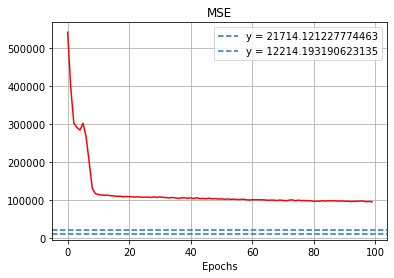

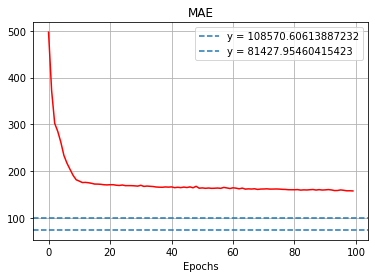

In [72]:
# Métriques 
plt.plot(h_LQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_hydro_LQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_hydro_LQ_train**2)))
plt.axhline(np.mean(y_hydro_LQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_hydro_LQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(h_LQ['mae'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
plt.axhline(0.2*np.mean(y_hydro_LQ_train),ls='--',label='y = ' +str(0.2*np.mean(y_hydro_LQ_train**2)))
plt.axhline(0.15*np.mean(y_hydro_LQ_train),ls='--',label='y = ' +str(0.15*np.mean(y_hydro_LQ_train**2)))
plt.legend()
plt.grid()
plt.show()

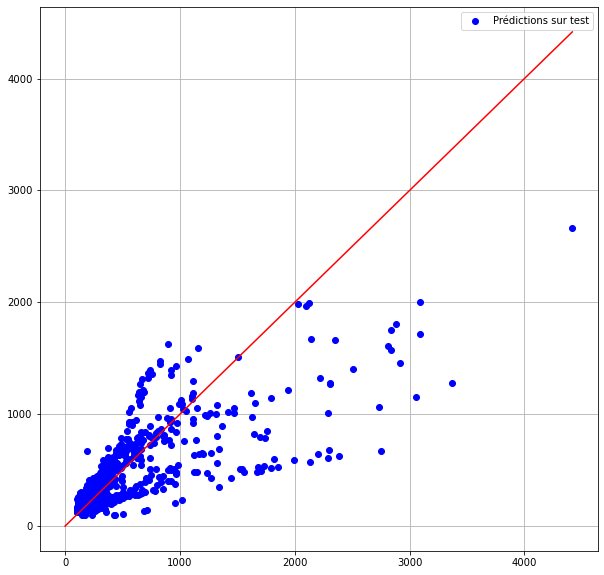

In [73]:
# Vérification des prédictions
plt.figure(figsize=(10,10))
plt.plot(y_hydro_LQ_test,model_LQ.predict(x_hydro_LQ_test),'bo',label='Prédictions sur test')
m = max(y_hydro_LQ_test)
x = np.arange(0,m)
plt.plot(x,x,'r')
plt.legend()
plt.grid()
plt.show()

#### Pour HQ 

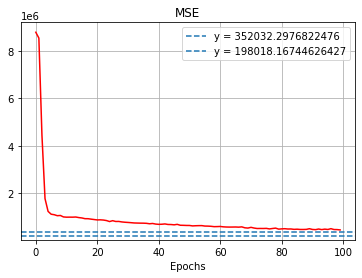

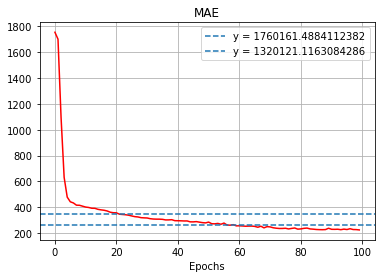

In [74]:
plt.plot(h_HQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_hydro_HQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_hydro_HQ_train**2)))
plt.axhline(np.mean(y_hydro_HQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_hydro_HQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(h_HQ['mae'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
plt.axhline(0.2*np.mean(y_hydro_HQ_train),ls='--',label='y = ' +str(0.2*np.mean(y_hydro_HQ_train**2)))
plt.axhline(0.15*np.mean(y_hydro_HQ_train),ls='--',label='y = ' +str(0.15*np.mean(y_hydro_HQ_train**2)))
plt.legend()
plt.grid()
plt.show()

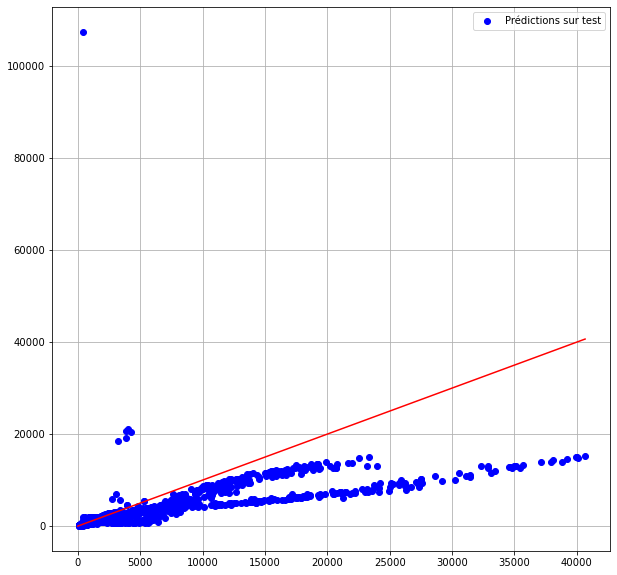

In [75]:
# Vérification des prédictions
plt.figure(figsize=(10,10))
plt.plot(y_hydro_HQ_test,model_HQ.predict(x_hydro_HQ_test),'bo',label='Prédictions sur test')
m = max(y_hydro_HQ_test)
x = np.arange(0,m)
plt.plot(x,x,'r')
plt.legend()
plt.grid()
plt.show()

#### Pour VHQ 

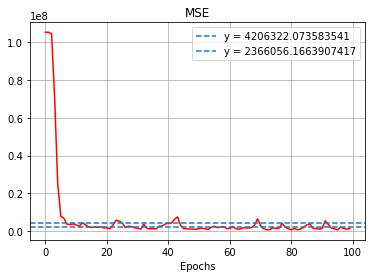

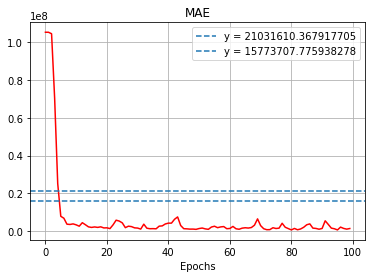

In [46]:
plt.plot(h_VHQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_hydro_VHQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_hydro_VHQ_train**2)))
plt.axhline(np.mean(y_hydro_VHQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_hydro_VHQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(h_VHQ['mae'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
plt.axhline(0.2*np.mean(y_hydro_VHQ_train**2),ls='--',label='y = ' +str(0.2*np.mean(y_hydro_VHQ_train**2)))
plt.axhline(0.15*np.mean(y_hydro_VHQ_train**2),ls='--',label='y = ' +str(0.15*np.mean(y_hydro_VHQ_train**2)))
plt.legend()
plt.grid()
plt.show()

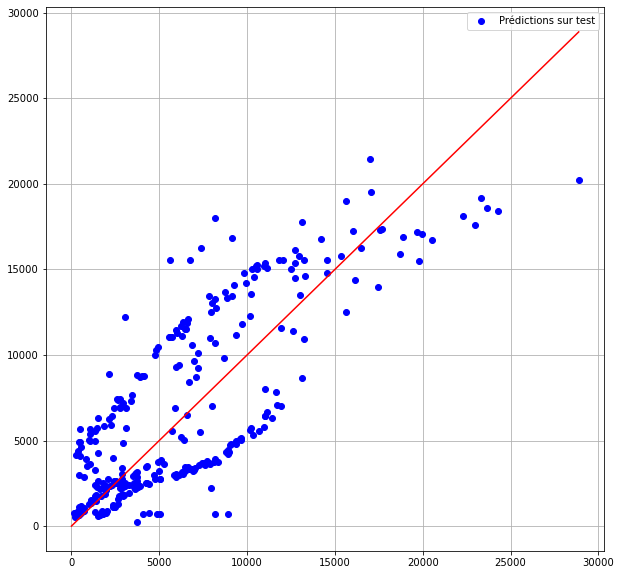

In [47]:
# Vérification des prédictions
plt.figure(figsize=(10,10))
plt.plot(y_hydro_VHQ_test,model_VHQ.predict(x_hydro_VHQ_test),'bo',label='Prédictions sur test')
m = max(y_hydro_VHQ_test)
x = np.arange(0,m)
plt.plot(x,x,'r')
plt.legend()
plt.grid()
plt.show()

# 3.2 ANN Pepsi

### 3.2.1 Création des classes

In [95]:
cpepsi = ['MississippiDownstream', 'Jamuna', 'Padma']

In [101]:
river_pepsi_HQ =river_means_pepsi[river_means_pepsi.river.isin(cpepsi)]
river_pepsi_LQ =river_means_pepsi[~river_means_pepsi.river.isin(cpepsi)]

data_pepsi_HQ = data_pepsi[data_pepsi.river.isin(cpepsi)]
data_pepsi_LQ = data_pepsi[~data_pepsi.river.isin(cpepsi)]

print("Shape classe HQ : ", data_pepsi_HQ.shape)
print("Shape classe LQ : ", data_pepsi_LQ.shape)

Shape classe HQ :  (3721, 23)
Shape classe LQ :  (47548, 23)


### 3.2.2 Choisir les données 

In [90]:
to_drop = ['day', 'reach', 'lon', 'lat', 'sinuosity',
       'meandwave', 'height', 'A', 'S',  'K', 'A0', 'Abar', 'alpha',
       'beta', 'Fr', 'U', '2_classes', '3_classes']
pepsi_LQ = data_pepsi_LQ.drop(to_drop,axis=1)
pepsi_HQ = data_pepsi_HQ.drop(to_drop,axis=1)


print(" Variables gardées : ", pepsi_LQ.columns.to_list())
print('Missing Data : ',pepsi_LQ.isna().sum().sum(), '  Shape is : ', pepsi_LQ.shape)
print('Missing Data : ',pepsi_HQ.isna().sum().sum(), '  Shape is : ', pepsi_HQ.shape)


 Variables gardées :  ['river', 'flowacc', 'W', 'dA', 'Q']
Missing Data :  0   Shape is :  (47548, 5)
Missing Data :  0   Shape is :  (3721, 5)


### 3.2.3 Echantillons test/train

In [172]:
print("Classe LQ : ") 
x_pepsi_LQ_train, y_pepsi_LQ_train , x_pepsi_LQ_test, y_pepsi_LQ_test, pepsi_LQ_test_name, pepsi_LQ_train_name = shuffle_river(pepsi_LQ,river_pepsi_LQ)
x_pepsi_LQ_train, y_pepsi_LQ_train , x_pepsi_LQ_test, y_pepsi_LQ_test, mean_pepsi_LQ, std_pepsi_LQ = normalization(x_pepsi_LQ_train, y_pepsi_LQ_train , x_pepsi_LQ_test, y_pepsi_LQ_test)

print("Classe HQ : ")
x_pepsi_HQ_train, y_pepsi_HQ_train , x_pepsi_HQ_test, y_pepsi_HQ_test, pepsi_HQ_test_name, pepsi_HQ_train_name = shuffle_river(pepsi_HQ,river_pepsi_HQ)
x_pepsi_HQ_train, y_pepsi_HQ_train , x_pepsi_HQ_test, y_pepsi_HQ_test, mean_pepsi_HQ, std_pepsi_HQ = normalization(x_pepsi_HQ_train, y_pepsi_HQ_train , x_pepsi_HQ_test, y_pepsi_HQ_test)



Classe LQ : 
Original data shape was :  (47548, 5)
x_train :  (40470, 3) y_train :  (40470,)
x_test  :  (7022, 3) y_test  :  (7022,)
Classe HQ : 
Original data shape was :  (3721, 5)
x_train :  (2749, 3) y_train :  (2749,)
x_test  :  (972, 3) y_test  :  (972,)


### 3.2.4 Apprentissage 

In [111]:
model_pepsi_LQ=get_model((shape,),n_layers,n_neurons)

In [112]:
model_pepsi_HQ=get_model((shape,),n_layers,n_neurons)

In [113]:
ep = 100
history_pepsi_LQ = model_pepsi_LQ.fit(x_pepsi_LQ_train,  y_pepsi_LQ_train, epochs = ep, batch_size = 100, verbose = 1, 
                    validation_data = (x_pepsi_LQ_test, y_pepsi_LQ_test))

Epoch 1/100
415/415 [==============================] - 11s 17ms/step - loss: 937.6960 - mae: 937.6960 - mse: 3720879.6355 - val_loss: 852.6358 - val_mae: 852.6358 - val_mse: 3019078.0000
Epoch 2/100
415/415 [==============================] - 8s 19ms/step - loss: 434.3729 - mae: 434.3729 - mse: 835545.5488 - val_loss: 1838.2869 - val_mae: 1838.2869 - val_mse: 15364539.0000
Epoch 3/100
415/415 [==============================] - 8s 19ms/step - loss: 424.0129 - mae: 424.0130 - mse: 789160.1526 - val_loss: 1019.2487 - val_mae: 1019.2487 - val_mse: 5665604.5000
Epoch 4/100
415/415 [==============================] - 6s 14ms/step - loss: 414.4207 - mae: 414.4207 - mse: 774139.8326 - val_loss: 860.1878 - val_mae: 860.1878 - val_mse: 3702669.2500
Epoch 5/100
415/415 [==============================] - 8s 20ms/step - loss: 409.1122 - mae: 409.1122 - mse: 714861.0894 - val_loss: 853.6882 - val_mae: 853.6882 - val_mse: 3617016.0000
Epoch 6/100
415/415 [==============================] - 7s 17ms/step 

Epoch 45/100
415/415 [==============================] - 7s 17ms/step - loss: 333.1076 - mae: 333.1076 - mse: 586889.9120 - val_loss: 979.3972 - val_mae: 979.3972 - val_mse: 4616081.0000
Epoch 46/100
415/415 [==============================] - 9s 21ms/step - loss: 334.0712 - mae: 334.0713 - mse: 574493.1595 - val_loss: 1168.9480 - val_mae: 1168.9480 - val_mse: 6195438.5000
Epoch 47/100
415/415 [==============================] - 9s 21ms/step - loss: 349.3050 - mae: 349.3050 - mse: 607882.2447 - val_loss: 946.3817 - val_mae: 946.3817 - val_mse: 3098615.5000
Epoch 48/100
415/415 [==============================] - 8s 19ms/step - loss: 342.4585 - mae: 342.4585 - mse: 598895.6372 - val_loss: 995.8684 - val_mae: 995.8684 - val_mse: 4592464.0000
Epoch 49/100
415/415 [==============================] - 8s 19ms/step - loss: 338.8192 - mae: 338.8192 - mse: 599745.2105 - val_loss: 926.2285 - val_mae: 926.2285 - val_mse: 5360521.0000
Epoch 50/100
415/415 [==============================] - 7s 17ms/step

Epoch 89/100
415/415 [==============================] - 5s 12ms/step - loss: 307.5442 - mae: 307.5442 - mse: 530848.4752 - val_loss: 1144.3218 - val_mae: 1144.3218 - val_mse: 5939144.0000
Epoch 90/100
415/415 [==============================] - 6s 15ms/step - loss: 306.1556 - mae: 306.1556 - mse: 535505.8847 - val_loss: 1044.8000 - val_mae: 1044.8000 - val_mse: 5606482.5000
Epoch 91/100
415/415 [==============================] - 6s 14ms/step - loss: 303.4432 - mae: 303.4432 - mse: 528346.1923 - val_loss: 940.6241 - val_mae: 940.6240 - val_mse: 4301625.5000
Epoch 92/100
415/415 [==============================] - 6s 16ms/step - loss: 305.9064 - mae: 305.9064 - mse: 530862.3951 - val_loss: 978.4387 - val_mae: 978.4387 - val_mse: 4745835.5000
Epoch 93/100
415/415 [==============================] - 6s 15ms/step - loss: 305.4031 - mae: 305.4031 - mse: 543591.4854 - val_loss: 916.3567 - val_mae: 916.3567 - val_mse: 3698599.0000
Epoch 94/100
415/415 [==============================] - 9s 22ms/st

In [120]:
ep = 100
history_pepsi_HQ = model_pepsi_HQ.fit(x_pepsi_HQ_train,  y_pepsi_HQ_train, epochs = ep, batch_size = 100, verbose = 1, 
                    validation_data = (x_pepsi_HQ_test, y_pepsi_HQ_test))

Epoch 1/100
28/28 [==============================] - 0s 17ms/step - loss: 5652.4834 - mae: 5652.4834 - mse: 64765656.0000 - val_loss: 47516.1758 - val_mae: 47516.1758 - val_mse: 2266373120.0000
Epoch 2/100
28/28 [==============================] - 1s 19ms/step - loss: 5677.7676 - mae: 5677.7676 - mse: 65982236.0000 - val_loss: 32100.6211 - val_mae: 32100.6211 - val_mse: 1034616896.0000
Epoch 3/100
28/28 [==============================] - 0s 18ms/step - loss: 5068.2021 - mae: 5068.2021 - mse: 53468700.0000 - val_loss: 33900.2227 - val_mae: 33900.2227 - val_mse: 1157161600.0000
Epoch 4/100
28/28 [==============================] - 1s 22ms/step - loss: 5399.2939 - mae: 5399.2939 - mse: 59545148.0000 - val_loss: 45570.6172 - val_mae: 45570.6172 - val_mse: 2087325184.0000
Epoch 5/100
28/28 [==============================] - 1s 26ms/step - loss: 4917.2886 - mae: 4917.2886 - mse: 50285304.0000 - val_loss: 39353.3594 - val_mae: 39353.3594 - val_mse: 1559912448.0000
Epoch 6/100
28/28 [===========

28/28 [==============================] - 0s 18ms/step - loss: 3724.1702 - mae: 3724.1702 - mse: 29060252.0000 - val_loss: 35409.6719 - val_mae: 35409.6680 - val_mse: 1262110336.0000
Epoch 86/100
28/28 [==============================] - 1s 21ms/step - loss: 3822.7424 - mae: 3822.7424 - mse: 31016270.0000 - val_loss: 31890.1133 - val_mae: 31890.1133 - val_mse: 1024155840.0000
Epoch 87/100
28/28 [==============================] - 1s 28ms/step - loss: 4121.4688 - mae: 4121.4688 - mse: 35805548.0000 - val_loss: 35794.8789 - val_mae: 35794.8789 - val_mse: 1293696256.0000
Epoch 88/100
28/28 [==============================] - 1s 30ms/step - loss: 3673.6272 - mae: 3673.6272 - mse: 28840248.0000 - val_loss: 39630.1445 - val_mae: 39630.1445 - val_mse: 1581464576.0000
Epoch 89/100
28/28 [==============================] - 1s 22ms/step - loss: 3562.0061 - mae: 3562.0061 - mse: 27674400.0000 - val_loss: 36497.4023 - val_mae: 36497.4023 - val_mse: 1347377536.0000
Epoch 90/100
28/28 [==================

### 3.2.5 Métriques et résultats

In [124]:
p_LQ=pd.DataFrame(data=history_pepsi_LQ.history)
p_HQ=pd.DataFrame(data=history_pepsi_HQ.history)

#### Classe pepsi LQ

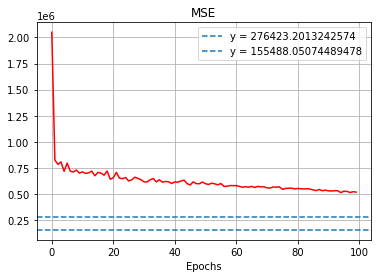

No handles with labels found to put in legend.


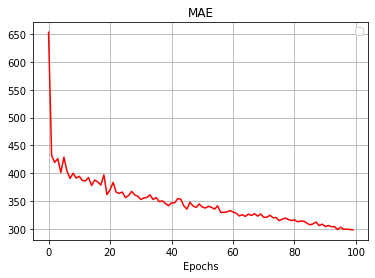

In [125]:
# Métriques 
plt.plot(p_LQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_pepsi_LQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_pepsi_LQ_train**2)))
plt.axhline(np.mean(y_pepsi_LQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_pepsi_LQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(p_LQ['mae'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
#plt.axhline(0.2*np.mean(y_pepsi_LQ_train**2),ls='--',label='y = ' +str(0.2*np.mean(y_pepsi_LQ_train**2)))
#plt.axhline(0.15*np.mean(y_pepsi_LQ_train**2),ls='--',label='y = ' +str(0.15*np.mean(y_pepsi_LQ_train**2)))
plt.legend()
plt.grid()
plt.show()

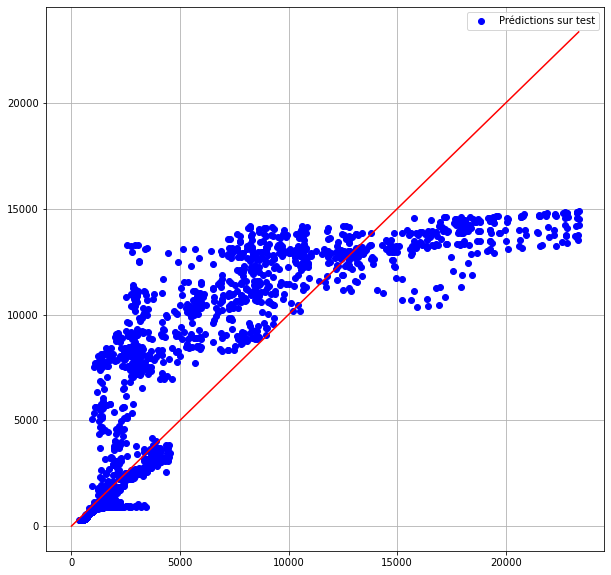

In [126]:
# Vérification des prédictions
plt.figure(figsize=(10,10))
plt.plot(y_pepsi_LQ_test,model_pepsi_LQ.predict(x_pepsi_LQ_test),'bo',label='Prédictions sur test')
m = max(y_pepsi_LQ_test)
x = np.arange(0,m)
plt.plot(x,x,'r')
plt.legend()
plt.grid()
plt.show()

#### Classe pepsi HQ

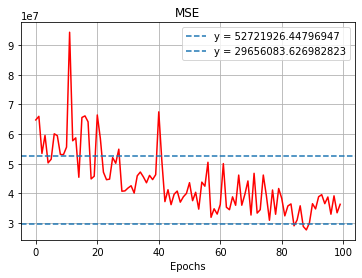

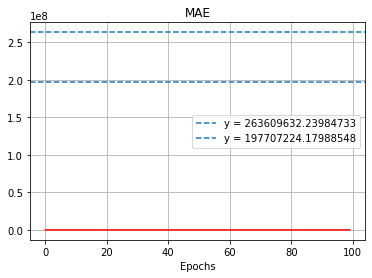

In [129]:
# Métriques 
plt.plot(p_HQ['mse'],'r')
plt.title('MSE')
plt.xlabel('Epochs')
plt.axhline(np.mean(y_pepsi_HQ_train**2)*0.04,ls='--',label='y = ' + str(0.04*np.mean(y_pepsi_HQ_train**2)))
plt.axhline(np.mean(y_pepsi_HQ_train**2)*0.15**2,ls='--',label='y = ' + str(0.15**2*np.mean(y_pepsi_HQ_train**2)))
plt.legend()
plt.grid()
plt.show()

plt.plot(p_HQ['mae'],'r')
plt.title('MAE')
plt.xlabel('Epochs')
plt.axhline(0.2*np.mean(y_pepsi_HQ_train**2),ls='--',label='y = ' +str(0.2*np.mean(y_pepsi_HQ_train**2)))
plt.axhline(0.15*np.mean(y_pepsi_HQ_train**2),ls='--',label='y = ' +str(0.15*np.mean(y_pepsi_HQ_train**2)))
plt.legend()
plt.grid()
plt.show()

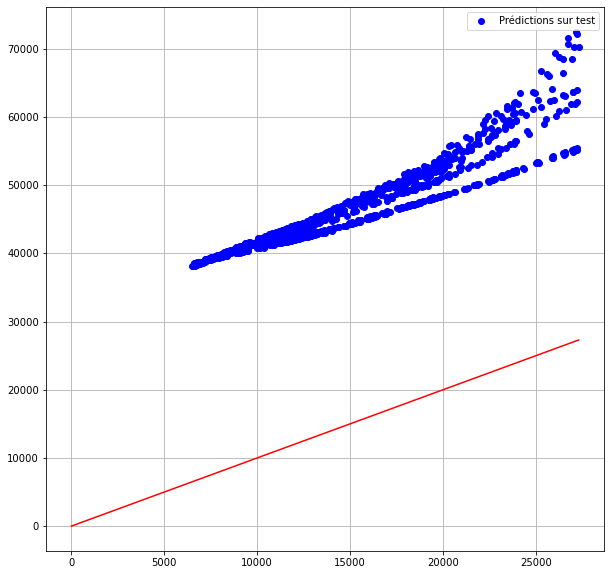

In [130]:
# Vérification des prédictions
plt.figure(figsize=(10,10))
plt.plot(y_pepsi_HQ_test,model_pepsi_HQ.predict(x_pepsi_HQ_test),'bo',label='Prédictions sur test')
m = max(y_pepsi_HQ_test)
x = np.arange(0,m)
plt.plot(x,x,'r')
plt.legend()
plt.grid()
plt.show()

### Prédiction sur un profil de rivière

In [178]:
class Profil_pepsi(param.Parameterized):
    variable= param.ObjectSelector(default=pepsi_LQ_test_name[0],objects=pepsi_LQ_test_name)
    reach= param.ObjectSelector(default=1,objects=[1,2,3])
    #nb_classe = param.ObjectSelector(default="2_classes",objects=['2_classes','3_classes'])
    def view(self):
        to_drop = ['U','Fr','alpha','beta','Abar','A0','K',
           'S','A','height','meandwave','sinuosity','lon','lat','reach','Q','day','river', '2_classes', '3_classes']

        river = data_pepsi[data_pepsi["river"] == self.variable]
        reach_data = river[river["reach"] == self.reach]
        Qrp = reach_data["Q"]
        reach_data = (reach_data - mean_pepsi_LQ)/std_pepsi_LQ
        
        x = np.arange(0,Qrp.shape[0])
        reach_data.drop(to_drop,axis=1, inplace = True)
        
        predict = model_pepsi_LQ.predict(reach_data)
        predict = predict.reshape(1,len(predict))[0]
        affichage1 = hv.Scatter((x,predict)).opts(show_legend=False, width=900, color ='r')
        affichage2 = hv.Curve((x,Qrp)).opts(show_legend=False, width=900, color = 'b')
        return pn.Row(affichage1*affichage2)
Profil_pepsi = Profil_pepsi()
pn.Column(Profil_pepsi.param,Profil_pepsi.view)

Column
    [0] Column(margin=5, name='Profil_pepsi', width=300)
        [0] StaticText(value='<b>Profil_pepsi</b>')
        [1] Select(name='Variable', options=OrderedDict([('Connecticut...]), value='Connecticut')
        [2] Select(name='Reach', options=OrderedDict([('1', ...]), value=1)
    [1] ParamMethod(method)

# <FONT COLOR="Red">Partie 4 : Réseaux de neuronnes LSTM</font> 